In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
inputShape=(3072,)
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=inputShape))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [3]:
# for _ in range(20):
#     model.add(layers.Dense(100,activation='elu',kernel_initializer='he_normal'))

# model.add(layers.Dense(10,activation='softmax'))
for _ in range(20):
    model.add(layers.Dense(100,kernel_initializer='he_normal',use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
model.add(layers.Dense(10,activation="softmax"))

In [4]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │       307,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 506,210 (1.93 MB)

 Trainable params: 502,210 (1.92 MB)

 Non-trainable params: 4,000 (15.62 KB)

In [6]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [7]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

x_train =  x_train.reshape(-1,32*32*3)
x_test = x_test.reshape(-1,32*32*3)


In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history = model.fit(x_train,y_train,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[early_stopping],
                    verbose=2                
                    )
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"Test accuracy:{test_acc:.4f}")

Epoch 1/100
352/352 - 11s - 32ms/step - accuracy: 0.3676 - loss: 1.7670 - val_accuracy: 0.3758 - val_loss: 1.8312
Epoch 2/100
352/352 - 4s - 12ms/step - accuracy: 0.4487 - loss: 1.5470 - val_accuracy: 0.3804 - val_loss: 1.8452
Epoch 3/100
352/352 - 4s - 12ms/step - accuracy: 0.4827 - loss: 1.4575 - val_accuracy: 0.3958 - val_loss: 1.7312
Epoch 4/100
352/352 - 4s - 12ms/step - accuracy: 0.5053 - loss: 1.3937 - val_accuracy: 0.4258 - val_loss: 1.6688
Epoch 5/100
352/352 - 5s - 13ms/step - accuracy: 0.5198 - loss: 1.3437 - val_accuracy: 0.4100 - val_loss: 1.7547
Epoch 6/100
352/352 - 4s - 13ms/step - accuracy: 0.5344 - loss: 1.3089 - val_accuracy: 0.4212 - val_loss: 1.7707
Epoch 7/100
352/352 - 4s - 12ms/step - accuracy: 0.5496 - loss: 1.2686 - val_accuracy: 0.4290 - val_loss: 1.8034
Epoch 8/100
352/352 - 4s - 12ms/step - accuracy: 0.5618 - loss: 1.2326 - val_accuracy: 0.4722 - val_loss: 1.5347
Epoch 9/100
352/352 - 4s - 12ms/step - accuracy: 0.5748 - loss: 1.2025 - val_accuracy: 0.4600 -

In [10]:
import numpy as np
mean = np.mean(x_train,axis=0)
std = np.std(x_train,axis=0)
x_train = (x_train-mean)/std
x_test = (x_test-mean)/std
model_alpha = keras.Sequential()
model_alpha.add(layers.InputLayer(input_shape=(32*32*3,)))
for _ in range(20):
    model_alpha.add(layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'))
    model_alpha.add(layers.AlphaDropout(0.1))
model_alpha.add(layers.Dense(10,activation='softmax'))

model_alpha.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']
                    )
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history_alpha = model_alpha.fit(x_train,y_train,
                                epochs=100,
                                batch_size=128,
                                validation_split=0.1,
                                callbacks=[early_stopping],
                                verbose=2
                                )
test_loss_alpha, test_acc_alpha = model_alpha.evaluate(x_test, y_test)
print(f"Test accuracy (Alpha Dropout): {test_acc_alpha:.4f}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
352/352 - 9s - 25ms/step - accuracy: 0.1671 - loss: 2.2349 - val_accuracy: 0.1964 - val_loss: 2.7784
Epoch 2/100
352/352 - 4s - 12ms/step - accuracy: 0.2332 - loss: 1.9782 - val_accuracy: 0.2524 - val_loss: 5.7846
Epoch 3/100
352/352 - 4s - 12ms/step - accuracy: 0.2571 - loss: 1.9101 - val_accuracy: 0.2886 - val_loss: 5.2003
Epoch 4/100
352/352 - 4s - 12ms/step - accuracy: 0.2839 - loss: 1.8580 - val_accuracy: 0.2990 - val_loss: 7.0234
Epoch 5/100
352/352 - 4s - 12ms/step - accuracy: 0.2998 - loss: 1.8349 - val_accuracy: 0.3218 - val_loss: 6.2727
Epoch 6/100
352/352 - 4s - 12ms/step - accuracy: 0.3277 - loss: 1.7817 - val_accuracy: 0.3122 - val_loss: 8.0340
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1964 - loss: 2.7563
Test accuracy (Alpha Dropout): 0.1981


In [13]:
import tensorflow.keras.backend as K

def predict_mc_dropout(model, x, n_iter=50):
    preds = []
    for _ in range(n_iter):
       
        pred = model(x, training=True)
        preds.append(pred.numpy())
    return np.mean(preds, axis=0)


In [14]:

y_pred_proba = predict_mc_dropout(model_alpha, x_test, n_iter=50)
y_pred_labels = np.argmax(y_pred_proba, axis=1)
y_true = y_test.flatten()


from sklearn.metrics import accuracy_score
mc_dropout_acc = accuracy_score(y_true, y_pred_labels)
print(f"Test accuracy (MC Dropout, avg 50 runs): {mc_dropout_acc:.4f}")


Test accuracy (MC Dropout, avg 50 runs): 0.2182


In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# One Cycle Schedule function
def one_cycle_lr(epoch, total_epochs, max_lr, base_lr=1e-5, final_lr=1e-6):
    if epoch < total_epochs / 2:
        # Phase 1: Increase LR
        lr = base_lr + (max_lr - base_lr) * (2 * epoch / total_epochs)
    else:
        # Phase 2: Decrease LR
        lr = max_lr - (max_lr - final_lr) * (2 * (epoch - total_epochs / 2) / total_epochs)
    return lr

# Keras-compatible scheduler callback
def get_1cycle_scheduler(total_epochs, max_lr):
    def schedule(epoch, lr):
        return one_cycle_lr(epoch, total_epochs, max_lr)
    return keras.callbacks.LearningRateScheduler(schedule)


In [16]:
# Build SELU model with AlphaDropout
def build_selu_model():
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(32 * 32 * 3,)))
    for _ in range(20):
        model.add(keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))
        model.add(keras.layers.AlphaDropout(0.1))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

# Load and standardize CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.reshape(-1, 32*32*3).astype("float32")
x_test = x_test.reshape(-1, 32*32*3).astype("float32")

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std


In [17]:
model_1cycle = build_selu_model()

optimizer = keras.optimizers.Nadam()

model_1cycle.compile(optimizer=optimizer,
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

epochs = 30
batch_size = 128
max_lr = 0.01  # Tune this

# Callbacks
lr_scheduler = get_1cycle_scheduler(epochs, max_lr)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_1cycle = model_1cycle.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[lr_scheduler, early_stopping],
    verbose=2
)

# Evaluate
test_loss_1cycle, test_acc_1cycle = model_1cycle.evaluate(x_test, y_test)
print(f"Test accuracy with 1Cycle LR schedule: {test_acc_1cycle:.4f}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/30
352/352 - 9s - 26ms/step - accuracy: 0.0995 - loss: 2.9421 - val_accuracy: 0.1928 - val_loss: 2.4249 - learning_rate: 1.0000e-05
Epoch 2/30
352/352 - 4s - 12ms/step - accuracy: 0.1586 - loss: 2.3023 - val_accuracy: 0.1586 - val_loss: 2.4787 - learning_rate: 6.7600e-04
Epoch 3/30
352/352 - 4s - 12ms/step - accuracy: 0.2134 - loss: 2.0200 - val_accuracy: 0.1840 - val_loss: 4.9257 - learning_rate: 0.0013
Epoch 4/30
352/352 - 4s - 12ms/step - accuracy: 0.2551 - loss: 1.9319 - val_accuracy: 0.2076 - val_loss: 4.4942 - learning_rate: 0.0020
Epoch 5/30
352/352 - 4s - 12ms/step - accuracy: 0.2734 - loss: 1.9001 - val_accuracy: 0.2760 - val_loss: 6.7257 - learning_rate: 0.0027
Epoch 6/30
352/352 - 4s - 12ms/step - accuracy: 0.2752 - loss: 1.9158 - val_accuracy: 0.2548 - val_loss: 4.7760 - learning_rate: 0.0033
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1972 - loss: 2.4123
Test accuracy with 1Cycle LR schedule: 0.1961


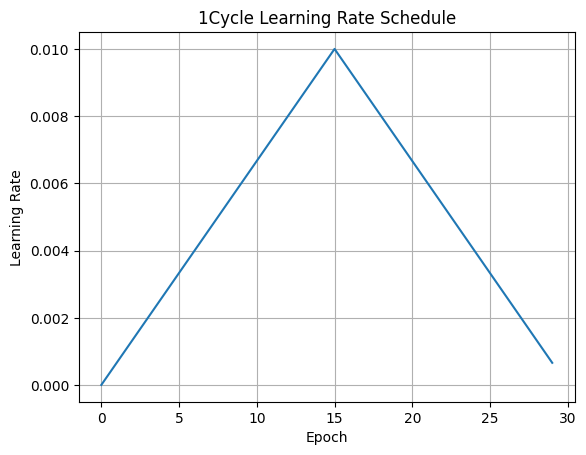

In [18]:
lrs = [one_cycle_lr(e, epochs, max_lr) for e in range(epochs)]
plt.plot(lrs)
plt.title("1Cycle Learning Rate Schedule")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()
